In [4]:
#Some imports
import numpy as np
import matplotlib.pyplot as plt
import random
import queue
import time
from IPython.display import clear_output

#Functions that will be very useful for creating/updating mazes

'''
Define the grid to be working with

**inputs:
dim = dimension size of the grid
n = number of mines

**returns:
board = the grid to be worked with
'''

def environment(dim, n):
    #start with a dim by dim zero array
    
    board = np.zeros((dim,dim))
    
    while n > 0:
        i = random.randint(0, dim - 1)
        j = random.randint(0, dim - 1)
        
        if board[i][j] == 9:
            pass
        else:
            board[i][j] = 9
            n -= 1
            
    for i in range(0, dim):
        for j in range(0, dim):
            if board[i][j] == 9:
                continue
            
            #check all the neighbors
            mines = 0
            rightValid = False
            leftValid = False
            upValid = False
            downValid = False
            if j - 1 >= 0:
                leftValid = True
            if j + 1 < len(board):
                rightValid = True
            if i + 1 < len(board):
                downValid = True
            if i - 1 >= 0:
                upValid = True
        
            #check left
            if leftValid == True:
                #check left adjacent
                if board[i][j-1] == 9:
                    #mine is here
                    mines += 1
                else:
                    #no mine is here
                    pass
                #check left & up
                if upValid == True:
                    if board[i-1][j-1] == 9:
                        #mine is here
                        mines += 1
                    else:
                        #no mine is here
                        pass           
                #check left & down
                if downValid == True:
                    if board[i+1][j-1] == 9:
                        #mine is here
                        mines += 1
                    else:
                        #no mine is here
                        pass
                        
            #check right
            if rightValid == True:
                #check right adjacent
                if board[i][j+1] == 9:
                    #mine is here
                    mines += 1
                else:
                    #no mine is here
                    pass
                #check right & up
                if upValid == True:
                    if board[i-1][j+1] == 9:
                        #mine is here
                        mines += 1
                    else:
                        #no mine is here
                        pass
                #check right & down
                if downValid == True:
                    if board[i+1][j+1] == 9:
                        #mine is here
                        mines += 1
                    else:
                        #no mine is here
                        pass
                        
            #check up adjacent
            if upValid == True:
                if board[i-1][j] == 9:
                    #mine is here
                    mines += 1
                else:
                    #no mine is here
                    pass
                    
            #check down adjacent
            if downValid == True:
                if board[i+1][j] == 9:
                    #mine is here
                    mines += 1
                else:
                    #no mine is here
                    pass
            
            board[i][j] = mines
    
    return board


'''
A Method to Check the Neighbors of a Cell

**inputs:
possible_moves = array of coordinates for the remaining moves
coord = tuple containing the coordinates

**returns:
neighbors = the list of neighbors for the given coordinate
'''

#feed in the checking function the remaining possible moves, and it will easily return the neighbors
def checkNeighbors(possible_moves, coord):
    neighbors = []
    i = coord[0]
    j = coord[1]
    
    if (i+1, j) in possible_moves:
        neighbors.append((i+1, j))
        
    if (i-1, j) in possible_moves:
        neighbors.append((i-1, j))
        
    if (i, j+1) in possible_moves:
        neighbors.append((i, j+1))
        
    if (i, j-1) in possible_moves:
        neighbors.append((i, j-1))
                          
    if (i+1, j+1) in possible_moves:
        neighbors.append((i+1, j+1))
                          
    if (i-1, j-1) in possible_moves:
        neighbors.append((i-1, j-1))
                          
    if (i+1, j-1) in possible_moves:
        neighbors.append((i+1, j-1))
                          
    if (i-1, j+1) in possible_moves:
        neighbors.append((i-1, j+1))
        
    return neighbors

'''
A Method to Update the Agent Board

**inputs:
coord = tuple containing the coordinates
main_board = the main board
agent_board = the agent board

**returns:
agent_board = the grid to be worked with
coord = tuple containing the coordinates
clue = number of adjacent mines
'''

def updateBoard(coord, main_board, agent_board):
    i = coord[0]
    j = coord[1]
    agent_board[i][j] = main_board[i][j]
    clue = agent_board[i][j]
    return agent_board, coord, clue

'''
A Method to Check the Number of Uncovered Mines for a Cell

**inputs:
board = the agent board
coord = tuple containing the coordinates

**returns:
mines = the number of neighboring mines
'''

def checkMines(board,coord): 
    #check all the neighbors
    mines = 0
    i = coord[0]
    j = coord[1]
    rightValid = False
    leftValid = False
    upValid = False
    downValid = False
    if j - 1 >= 0:
        leftValid = True
    if j + 1 < len(board):
         rightValid = True
    if i + 1 < len(board):
         downValid = True
    if i - 1 >= 0:
        upValid = True
        
    #check left
    if leftValid == True:
        #check left adjacent
        if int(board[i][j-1]) == 9 or board[i][j-1] == 0.5:
            #mine is here
            mines += 1
        else:
            #no mine is here
            pass
        #check left & up
        if upValid == True:
            if int(board[i-1][j-1]) == 9 or board[i-1][j-1] == 0.5:
                #mine is here
                mines += 1
            else:
                #no mine is here
                pass           
        #check left & down
        if downValid == True:
            if int(board[i+1][j-1]) == 9 or board[i+1][j-1] == 0.5:
                #mine is here
                mines += 1
            else:
                #no mine is here
                pass
                        
    #check right
    if rightValid == True:
        #check right adjacent
        if int(board[i][j+1]) == 9 or board[i][j+1] == 0.5:
            #mine is here
            mines += 1
        else:
            #no mine is here
            pass
        #check right & up
        if upValid == True:
            if int(board[i-1][j+1]) == 9 or board[i-1][j+1] == 0.5:
                 #mine is here
                mines += 1
            else:
                #no mine is here
                pass
        #check right & down
        if downValid == True:
            if int(board[i+1][j+1]) == 9 or board[i+1][j+1] == 0.5:
                #mine is here
                mines += 1
            else:
                #no mine is here
                pass
                        
    #check up adjacent
    if upValid == True:
        if int(board[i-1][j]) == 9 or board[i-1][j] == 0.5:
            #mine is here
            mines += 1
        else:
            #no mine is here
            pass
                    
    #check down adjacent
    if downValid == True:
        if int(board[i+1][j]) == 9 or board[i+1][j] == 0.5:
            #mine is here
            mines += 1
        else:
            #no mine is here
            pass
            
    return mines


def myFunc(e):
    return len(e)

In [2]:
a = environment(20,20)
print(a)

[[ 9.  1.  0.  0.  1.  1.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1.  1.  0.  0.  1.  9.  2.  9.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.
   0.  0.]
 [ 0.  0.  0.  0.  1.  1.  2.  1.  1.  0.  0.  0.  0.  0.  1.  9.  2.  1.
   1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  9.
   2.  1.]
 [ 1.  1.  1.  0.  0.  0.  0.  1.  2.  2.  1.  0.  0.  0.  0.  0.  1.  2.
   9.  1.]
 [ 1.  9.  1.  0.  0.  0.  0.  1.  9.  9.  1.  0.  0.  0.  0.  0.  0.  1.
   1.  1.]
 [ 1.  1.  1.  0.  0.  0.  0.  1.  2.  2.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  9.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [5]:
'''
The Actual Game to be Played by our Agent

***********************NO INPUTS****************************

**inputs:
dim = dimension size of the grid
n = number of mines

**returns:

'''

def MinesweeperNInputs(dim, n):
    
    #create our main board and the board the agent will see
    main_board = environment(dim, n)
    agent_board = environment(dim, 0) + 11

    #our three fringes, which make up our general knowledge base
    mineFringe = []
    safeFringe = []
    KB = []

    #populate a list of all the possible moves we can make, which will keep track of moves that can be made
    possible_moves = []
    for i in range(0, dim):
        for j in range(0, dim):
            possible_moves.append((i, j))

    
    #play until we finish the game
    gameFinished = False
    while gameFinished == False:
        
        #our terminating condition
        if len(possible_moves)==0: 
            gameFinished=True
            
            clear_output()
            
            
            #UNCOMMENT TO SHOW BOARD OUTPUTS
            '''
            print("Agent's Board:")
            print(agent_board)
            print("The Actual Board:")
            print(main_board)
            '''
            
            #check our final score (# of correctly identified mines/# of total mines)
            total, correct = 0, 0 
            for i in range(0, dim):
                for j in range(0, dim):
                    if main_board[i][j] == 9:
                        total += 1
                    if agent_board[i][j] == 0.5:
                        correct += 1
            
            score = correct/total
            return score
        
        else:  
            
            '''
            #CHECK THE MINE FRINGE
            '''
            
            #if nothing in the mine fringe pass to next step
            if len(mineFringe) == 0:
                pass
            
            #immediately flag things in mine fringe
            else:
                
                #go through the mineFringe and flag spots until the fringe is empty again
                while len(mineFringe) != 0:
                    
                    #flag a spot with 0.5
                    agent_board[mineFringe[0][0]][mineFringe[0][1]] = 0.5
                    
                    #remove from possible moves and mine fringe
                    possible_moves.remove(mineFringe[0])
                    mineFringe.remove(mineFringe[0])
                    
                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE SAFE FRINGE
            '''
            
            #if nothing in the safe fringe pass to next step
            if len(safeFringe) == 0:
                pass
            
            #immediately open things in safe fringe
            else:
                
                #go through the safeFringe and open spots until the fringe is empty again
                while len(safeFringe) != 0:
                    
                    #if the move has already been made
                    if not(safeFringe[0] in possible_moves):
                        safeFringe.remove(safeFringe[0])
                        continue
                        
                    #show the recommened move
                    i = safeFringe[0][0]
                    j = safeFringe[0][1]
                    
                    #open a spot if it is in the safe fringe
                    agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)
                    
                    #add move to KB, then remove from possible moves and mine fringe
                    KB.append([coord, clue, len(checkNeighbors(possible_moves, coord))])
                    possible_moves.remove(safeFringe[0])
                    safeFringe.remove(safeFringe[0])
                    
                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE KNOWLEDGE BASE
            '''
            
            #if nothing in the KB pass to next step
            if len(KB) == 0:
                pass
            
            #look through our KB for moves to add to safe fringe or mine fringe
            else:
                #make a list for things to be removed from KB
                to_be_removed = []
                for item in range(0, len(KB)):
                    
                    #updates the value of adjacent neighbors in the KB
                    KB[item][2] = len(checkNeighbors(possible_moves, KB[item][0]))
                    
                    #checks if all the mines have been found for a clue already; if so prepare to remove from KB
                    if KB[item][1] != 0 and checkMines(agent_board, KB[item][0]) == int(KB[item][1]):
                        
                        #add the moves to safe fringe and get ready for removal
                        safeFringe += checkNeighbors(possible_moves, KB[item][0])
                        to_be_removed.append(KB[item])
                        
                    
                #if there are things to be removed, remove them
                if len(to_be_removed) > 0:
                    while len(to_be_removed) > 0:
                        i = 0
                        while i < len(KB):
                            
                            #find the thing to be removed in KB
                            if to_be_removed[0][0] == KB[i][0]:
                                KB.remove(KB[i])
                                to_be_removed.remove(to_be_removed[0])
                                break
                            else:
                                i += 1
                    
                    #restarts main while loop from beginning
                    continue
                    
                    
                
                check = False
                #check each item in the KB
                for item in KB:
                    #if clue is 0 all neighbors are safe
                    if item[1] == 0: 
                        x = item
                        safeFringe += checkNeighbors(possible_moves, x[0]) 
                        check = True
                        break
                
                
                    #if number of neighbors is equal to clue, all are mines 
                    elif item[1] - checkMines(agent_board, item[0]) == item[2]: 
                        x = item
                        mineFringe += checkNeighbors(possible_moves, x[0]) 
                        check = True
                        break 
                    
                    #if neither of the two above things, don't do anything
                    else:
                        pass
                    
                        
                #only remove from KB if we added something to mine or safe fringe
                if check == True:
                    KB.remove(x)
                    continue
                
            '''
            #RANDOMPICK (LAST RESORT)
            '''
            
            #pick a random coordinate from the remaining possible moves
            x = random.randint(0,len(possible_moves) - 1)
            i = possible_moves[x][0]
            j = possible_moves[x][1]
            
            #open the random spot
            agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)
            
            #if the spot we hit was a mine tell the user and keep going, no need to add to KB
            if clue==9:
                pass
            
            #otherwise add to KB
            else:
                KB.append([coord, clue, len(checkNeighbors(possible_moves, coord))])
            
            #remove from possible moves
            possible_moves.remove(coord)
        

In [ ]:
MinesweeperNInputs(50,75)

In [ ]:
nlist = np.linspace(20, 100, 80)
score = []
for n in nlist:
    temp = []
    while len(temp) < 10:
        temp.append(MinesweeperNInputs(20, n))
    score.append(sum(temp)/len(temp))
    print(n)
    


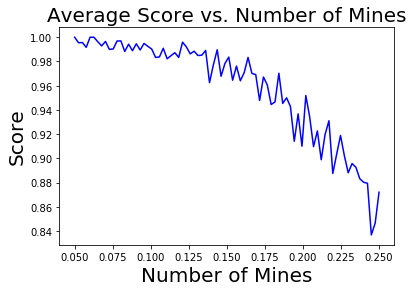

In [259]:
plt.xlabel('Number of Mines',fontsize=20)
plt.ylabel('Score',fontsize=20)

plt.plot(nlist/400,score,'b',linewidth=1.5,label = 'm1')
plt.title("Average Score vs. Number of Mines", fontsize = 20)
plt.show()

In [238]:
'''
a = environment(10, 20)
b = environment(10, 0)
print(a)
print()
print(b)
c = np.zeros((10,10))
for i in range(0, 10):
    for j in range(0, 10):
        c[i][j] = '*'

print(c)
'''

"\na = environment(10, 20)\nb = environment(10, 0)\nprint(a)\nprint()\nprint(b)\nc = np.zeros((10,10))\nfor i in range(0, 10):\n    for j in range(0, 10):\n        c[i][j] = '*'\n\nprint(c)\n"

In [58]:
'''
****potentially for visuals*****


print('hi!')
time.sleep(2)
clear_output()
'''

In [275]:
'''
The Actual Game to be Played by our Agent

***********************INPUTS****************************

**inputs:
dim = dimension size of the grid
n = number of mines

**returns:

'''

def MinesweeperInputs(dim, n):
    
    #create our main board and the board the agent will see
    main_board = environment(dim, n)
    agent_board = environment(dim, 0) + 11
    print(main_board)

    #our three fringes, which make up our general knowledge base
    mineFringe = []
    safeFringe = []
    KB = []

    #populate a list of all the possible moves we can make, which will keep track of moves that can be made
    possible_moves = []
    for i in range(0, dim):
        for j in range(0, dim):
            possible_moves.append((i, j))

    
    #play until we finish the game
    gameFinished = False
    while gameFinished == False:
        
        #our terminating condition
        if len(possible_moves)==0: 
            gameFinished=True
            
            clear_output()
            
            print("Agent's Board:")
            print(agent_board)
            print("The Actual Board:")
            print(main_board)
            return
        
        else:  
            
            '''
            #CHECK THE MINE FRINGE
            '''
            
            #if nothing in the mine fringe pass to next step
            if len(mineFringe) == 0:
                pass
            
            #immediately flag things in mine fringe
            else:
                
                #go through the mineFringe and flag spots until the fringe is empty again
                while len(mineFringe) != 0:
                    
                    #take an input from the user
                    print("recommended mine at:", (mineFringe[0][0], mineFringe[0][1]))
                    i = int(input())
                    j = int(input())
                    
                    clear_output()
                    
                    #flag a spot with 0.5
                    agent_board[i][j] = 0.5
                    
                    #remove from possible moves and mine fringe
                    possible_moves.remove(mineFringe[0])
                    mineFringe.remove(mineFringe[0])
                    
                    #show the updated board
                    print(agent_board)
                    
                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE SAFE FRINGE
            '''
            
            #if nothing in the safe fringe pass to next step
            if len(safeFringe) == 0:
                pass
            
            #immediately open things in safe fringe
            else:
                
                #go through the safeFringe and open spots until the fringe is empty again
                while len(safeFringe) != 0:
                    
                    #if the move has already been made
                    if not(safeFringe[0] in possible_moves):
                        safeFringe.remove(safeFringe[0])
                        continue
                        
                    #take an input from the user
                    print("recommended safe move at:", (safeFringe[0][0], safeFringe[0][1]))
                    i = int(input())
                    j = int(input())
                    
                    clear_output()
                    
                    #open a spot if it is in the safe fringe
                    agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)
                    
                    #add move to KB, then remove from possible moves and mine fringe
                    KB.append([coord, clue, len(checkNeighbors(possible_moves, coord))])
                    possible_moves.remove(safeFringe[0])
                    safeFringe.remove(safeFringe[0])
                    
                    #show the updated board
                    print(agent_board)
                    
                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE KNOWLEDGE BASE
            '''
            
            #if nothing in the KB pass to next step
            if len(KB) == 0:
                pass
            
            #look through our KB for moves to add to safe fringe or mine fringe
            else:
                #make a list for things to be removed from KB
                to_be_removed = []
                for item in range(0, len(KB)):
                    
                    #updates the value of adjacent neighbors in the KB
                    KB[item][2] = len(checkNeighbors(possible_moves, KB[item][0]))
                    
                    #checks if all the mines have been found for a clue already; if so prepare to remove from KB
                    if KB[item][1] != 0 and checkMines(agent_board, KB[item][0]) == int(KB[item][1]):
                        
                        #add the moves to safe fringe and get ready for removal
                        safeFringe += checkNeighbors(possible_moves, KB[item][0])
                        to_be_removed.append(KB[item])
                        
                    
                #if there are things to be removed, remove them
                if len(to_be_removed) > 0:
                    while len(to_be_removed) > 0:
                        i = 0
                        while i < len(KB):
                            
                            #find the thing to be removed in KB
                            if to_be_removed[0][0] == KB[i][0]:
                                KB.remove(KB[i])
                                to_be_removed.remove(to_be_removed[0])
                                break
                            else:
                                i += 1
                    
                    #restarts main while loop from beginning
                    continue
                    
                    
                
                check = False
                #check each item in the KB
                for item in KB:
                    #if clue is 0 all neighbors are safe
                    if item[1] == 0: 
                        x = item
                        safeFringe += checkNeighbors(possible_moves, x[0]) 
                        check = True
                        break
                
                
                    #if number of neighbors is equal to clue, all are mines 
                    elif item[1] - checkMines(agent_board, item[0]) == item[2]: 
                        x = item
                        mineFringe += checkNeighbors(possible_moves, x[0]) 
                        check = True
                        break 
                    
                    #if neither of the two above things, don't do anything
                    else:
                        pass
                    
                        
                #only remove from KB if we added something to mine or safe fringe
                if check == True:
                    KB.remove(x)
                    continue
                
            '''
            #RANDOMPICK (LAST RESORT)
            '''
            
            #pick a random coordinate from the remaining possible moves
            x = random.randint(0,len(possible_moves) - 1)
            
            #take an input from the user
            print("recommended random move: ", possible_moves[x])
            i = int(input())
            j = int(input())
            
            clear_output()
            
            #open the random spot
            agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)
            
            #if the spot we hit was a mine tell the user and keep going, no need to add to KB
            if clue==9:
                print('MINE HIT AT:',coord)
            
            #otherwise add to KB
            else:
                KB.append([coord, clue, len(checkNeighbors(possible_moves, coord))])
            
            #remove from possible moves
            possible_moves.remove(coord)
            print(agent_board)
            
    return

In [ ]:
MinesweeperInputs(5,5)

In [293]:
import math
maxx = 0
i, j, k, = 0,0,0
nums = np.linspace(0, math.pi, 100)
for x in nums:
    for y in nums:
        for z in nums:
            function = math.cos(2*x) + math.cos(2*(y - x)) + math.cos(2*(y - z)) - math.cos(2*z)
            if function > maxx:
                i = x
                j = y
                k = z
                maxx = function
print(i, j, k, maxx)

0.3807991095260356 0.7615982190520711 1.1741305877052763 2.827452375473594


In [349]:
#an equation of the form a + b + c + d + e = 2
x = [(0,0),(1,0),(2,0),(3,0),(4,0),(2)]
#an equation of the form a + b = 1
y = [(0,0),(1,0),(1)]
#an equation of the form c + d = 1 
z = [(2,0),(3,0),(1)]
#e + f = 1
zz = [(4,0),(8,0),(1)]

def myFunc(e):
    return len(e)

data = [x, y, z, zz]
data.sort(key=myFunc)
print('first')
print(data)
print()

#WORKS
stop = False
while not stop:
    k = 1
    reshuffle = False
    while k <= len(data) - 2:
        for i in range(0, len(data) - k):
    
            good = True
    
            for j in range(0, len(data[i]) - 1):
                if data[i][j] in data[-1]:
                    pass
                else:
                    good = False
                    break

            if good:
                reshuffle = True
                for j in range(0, len(data[i]) - 1):
                    data[len(data) - k].remove(data[i][j])
                data[len(data) - k][-1] -= data[i][-1] 
                print('update')
                print(data)
                print()
        k += 1
    
    #if we made an inference of any kind... reshuffle the data and see if we can make any more
    if reshuffle:
        data.sort(key=myFunc)
        print(data)

    else:
        stop = True

'''
#this happens after no more inference can be made from current cells
removal = []
for i in range(0, len(data)):
    if len(data[i]) == 2: 
        
        removal.append(data[i])
        print("found:", data[i])
        
        #add to safe fringe
        if data[i][-1] == 0:
            safeFringe.append(data[i][0])
        
        #check if goes in mine
        elif data[i][-1] == 1:
            mineFringe.append(data[i][0])
            
        
if len(removal) > 0:
    while len(removal) > 0:
        i = 0
        while i < len(data):
                            
            #find the thing to be removed in KB
            if removal[0] == data[i]:
                data.remove(data[i])
                removal.remove(removal[0])
                break
            else:
                i += 1
'''
print()

first
[[(0, 0), (1, 0), 1], [(2, 0), (3, 0), 1], [(4, 0), (8, 0), 1], [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), 2]]

update
[[(0, 0), (1, 0), 1], [(2, 0), (3, 0), 1], [(4, 0), (8, 0), 1], [(2, 0), (3, 0), (4, 0), 1]]

update
[[(0, 0), (1, 0), 1], [(2, 0), (3, 0), 1], [(4, 0), (8, 0), 1], [(4, 0), 0]]

[[(4, 0), 0], [(0, 0), (1, 0), 1], [(2, 0), (3, 0), 1], [(4, 0), (8, 0), 1]]
update
[[(4, 0), 0], [(0, 0), (1, 0), 1], [(2, 0), (3, 0), 1], [(8, 0), 1]]

[[(4, 0), 0], [(8, 0), 1], [(0, 0), (1, 0), 1], [(2, 0), (3, 0), 1]]



In [447]:
'''
The Actual Game to be Played by our Agent

***********************INFERENCE****************************

**inputs:
dim = dimension size of the grid
n = number of mines

**returns:

'''

def MinesweeperInference(dim, n):
    
    #create our main board and the board the agent will see
    main_board = environment(dim, n)
    agent_board = environment(dim, 0) + 11

    #our three fringes, which make up our general knowledge base
    mineFringe = []
    safeFringe = []
    KB = []

    #populate a list of all the possible moves we can make, which will keep track of moves that can be made
    possible_moves = []
    for i in range(0, dim):
        for j in range(0, dim):
            possible_moves.append((i, j))

    
    #play until we finish the game
    gameFinished = False
    while gameFinished == False:
        
        #our terminating condition
        if len(possible_moves)==0: 
            gameFinished=True
            
            clear_output()
            
            
            #UNCOMMENT TO SHOW BOARD OUTPUTS
            '''
            print("Agent's Board:")
            print(agent_board)
            print("The Actual Board:")
            print(main_board)
            '''
            
            #check our final score (# of correctly identified mines/# of total mines)
            total, correct = 0, 0 
            for i in range(0, dim):
                for j in range(0, dim):
                    if main_board[i][j] == 9:
                        total += 1
                    if agent_board[i][j] == 0.5:
                        correct += 1
            
            score = correct/total
            return score
        
        else:  
            
            print(agent_board)
            
            '''
            #CHECK THE MINE FRINGE
            '''
            
            #if nothing in the mine fringe pass to next step
            if len(mineFringe) == 0:
                pass
            
            #immediately flag things in mine fringe
            else:
                
                #go through the mineFringe and flag spots until the fringe is empty again
                while len(mineFringe) != 0:
                    
                    #flag a spot with 0.5
                    agent_board[mineFringe[0][0]][mineFringe[0][1]] = 0.5
                    
                    #remove from possible moves and mine fringe
                    possible_moves.remove(mineFringe[0])
                    mineFringe.remove(mineFringe[0])
                    
                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE SAFE FRINGE
            '''
            
            #if nothing in the safe fringe pass to next step
            if len(safeFringe) == 0:
                pass
            
            #immediately open things in safe fringe
            else:
                
                #go through the safeFringe and open spots until the fringe is empty again
                while len(safeFringe) != 0:
                    
                    #if the move has already been made
                    if not(safeFringe[0] in possible_moves):
                        safeFringe.remove(safeFringe[0])
                        continue
                        
                    #show the recommened move
                    i = safeFringe[0][0]
                    j = safeFringe[0][1]
                    
                    #open a spot if it is in the safe fringe
                    agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)
                    
                    #add move to KB, then remove from possible moves and mine fringe
                    KB.append([coord, clue, len(checkNeighbors(possible_moves, coord))])
                    possible_moves.remove(safeFringe[0])
                    safeFringe.remove(safeFringe[0])
                    
                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE KNOWLEDGE BASE
            '''
            
            #if nothing in the KB pass to next step
            if len(KB) == 0:
                pass
            
            #look through our KB for moves to add to safe fringe or mine fringe
            else:
                #make a list for things to be removed from KB
                to_be_removed = []
                for item in range(0, len(KB)):
                    
                    #updates the value of adjacent neighbors in the KB
                    KB[item][2] = len(checkNeighbors(possible_moves, KB[item][0]))
                    print(KB)
                    
                    #HOW TF DO WE UPDATE THIS PROPERLY????
                    KB[item][1] = checkMines(agent_board, KB[item][0])
                    print(checkMines(agent_board, KB[item][0]))
                    print(KB[item][1])
                    
                    
                    #checks if all the mines have been found for a clue already; if so prepare to remove from KB
                    if KB[item][1] != 0 and checkMines(agent_board, KB[item][0]) == int(KB[item][1]):
                        
                        #add the moves to safe fringe and get ready for removal
                        safeFringe += checkNeighbors(possible_moves, KB[item][0])
                        to_be_removed.append(KB[item])
                        
                    
                #if there are things to be removed, remove them
                if len(to_be_removed) > 0:
                    while len(to_be_removed) > 0:
                        i = 0
                        while i < len(KB):
                            
                            #find the thing to be removed in KB
                            if to_be_removed[0][0] == KB[i][0]:
                                KB.remove(KB[i])
                                to_be_removed.remove(to_be_removed[0])
                                break
                            else:
                                i += 1
                    
                    #restarts main while loop from beginning
                    continue
                    
                    
                
                check = False
                #check each item in the KB
                for item in KB:
                    #if clue is 0 all neighbors are safe
                    if item[1] == 0: 
                        x = item
                        safeFringe += checkNeighbors(possible_moves, x[0]) 
                        check = True
                        break
                
                
                    #if number of neighbors is equal to clue, all are mines 
                    elif item[1] - checkMines(agent_board, item[0]) == item[2]: 
                        x = item
                        mineFringe += checkNeighbors(possible_moves, x[0]) 
                        check = True
                        break 
                    
                    #if neither of the two above things, don't do anything
                    else:
                        pass
                    
                        
                #only remove from KB if we added something to mine or safe fringe
                if check == True:
                    KB.remove(x)
                    continue
          
            '''
            #INFERENCE
            '''
            
            #data = [[coord, clue]], KB = [[coord,clue,num neighbors]]
            print('new')
            print()
            data = []
            for item in KB:
                x = checkNeighbors(possible_moves,item[0])
                x.append(item[1])
                data.append(x)
                
            data.sort(key=myFunc)
            print(data)
            print()
            
            stop = False
            if len(data) == 1:
                stop = True
            
            while not stop:
                k = 1
                reshuffle = False
                while k <= len(data) - 1:
                    for i in range(0, len(data) - k):
    
                        good = True
    
                        for j in range(0, len(data[i]) - 1):
                            if data[i][j] in data[len(data) - k][0:len(data[len(data) - k])-1]:
                                print(data[i][j], data[len(data) - k][0:len(data[len(data) - k])-1])
                                print('yes')
                                print()
                                pass
                            else:
                                good = False
                                break

                        if good:
                            reshuffle = True
                            for j in range(0, len(data[i]) - 1):
                                data[len(data) - k].remove(data[i][j])
                            data[len(data) - k][-1] -= data[i][-1]
                            if data[len(data) - k][-1] == 0:
                                data.remove(data[len(data) - k])
                    k += 1
    
                #if we made an inference of any kind... reshuffle the data and see if we can make any more
                if reshuffle:
                    data.sort(key=myFunc)
                    print("reshuffle!",data)
                    print()

                else:
                    stop = True

            
            #this happens after no more inference can be made from current cells
            removal = []
            gobackup = False
            for i in range(0, len(data)):
                if len(data[i]) == 2: 
                    gobackup = True
        
                    removal.append(data[i])
        
                    #add to safe fringe
                    if data[i][-1] == 0:
                        safeFringe.append(data[i][0])
                        print("safe inference!!")
        
                    #check if goes in mine
                    elif data[i][-1] == 1:
                        mineFringe.append(data[i][0])
                        print("mine inference!")
                        
                    else:
                        print("**************ERROR**************")
                        print(data[i][0])
            
        
            if len(removal) > 0:
                while len(removal) > 0:
                    i = 0
                    while i < len(data):
                            
                        #find the thing to be removed in KB
                        if removal[0] == data[i]:
                            data.remove(data[i])
                            removal.remove(removal[0])
                            break
                        else:
                            i += 1
            
            if gobackup:
                continue
                
                
            '''
            #RANDOMPICK (LAST RESORT)
            '''
            
            #pick a random coordinate from the remaining possible moves
            x = random.randint(0,len(possible_moves) - 1)
            i = possible_moves[x][0]
            j = possible_moves[x][1]
            
            #open the random spot
            agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)
            
            #if the spot we hit was a mine tell the user and keep going, no need to add to KB
            if clue==9:
                pass
            
            #otherwise add to KB
            else:
                KB.append([coord, clue, len(checkNeighbors(possible_moves, coord))])
            
            #remove from possible moves
            possible_moves.remove(coord)
        

In [448]:
MinesweeperInference(10, 50)

[[11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]]
new

[]

[[11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11.  9.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]]
new

[]

[[11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 

reshuffle! [[13.0], [(1, 2), -1742.0], [(3, 3), (4, 3), -1734.0], [(1, 0), (1, 1), -1733.0], [(5, 1), (5, 2), (5, 0), -1733.0], [(5, 2), (5, 3), (5, 1), -1745.0], [(3, 3), (1, 1), (1, 3), -1723.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -1744.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -1798.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -1774.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -1786.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -1755.0], [(3, 3), (4, 3), -1747.0], [(1, 0), (1, 1), -1746.0], [(5, 1), (5, 2), (5, 0), -1746.0], [(5, 2), (5, 3), (5, 1), -1758.0], [(3, 3), (1, 1), (1, 3), -1736.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -1757.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -1811.0], [(6, 3),


(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -3757.0], [(3, 3), (4, 3), -3749.0], [(1, 0), (1, 1), -3748.0], [(5, 1), (5, 2), (5, 0), -3748.0], [(5, 2), (5, 3), (5, 1), -3760.0], [(3, 3), (1, 1), (1, 3), -3738.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -3759.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -3813.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -3789.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -3801.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -3770.0], [(3, 3), (4, 3), -3762.0], [(1, 0), (1, 1), -3761.0], [(5, 1), (5, 

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -6006.0], [(3, 3), (4, 3), -5998.0], [(1, 0), (1, 1), -5997.0], [(5, 1), (5, 2), (5, 0), -5997.0], [(5, 2), (5, 3), (5, 1), -6009.0], [(3, 3), (1, 1), (1, 3), -5987.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -6008.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -6062.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -6038.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -6050.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -6019.0], [(3, 3), (4, 3), -6011.0], [(1, 0), (1, 1), -6010.0], [(5, 1), (5, 2

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -8060.0], [(3, 3), (4, 3), -8052.0], [(1, 0), (1, 1), -8051.0], [(5, 1), (5, 2), (5, 0), -8051.0], [(5, 2), (5, 3), (5, 1), -8063.0], [(3, 3), (1, 1), (1, 3), -8041.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -8062.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -8116.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -8092.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -8104.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -8073.0], [(3, 3), (4, 3), -8065.0], [(1, 0), (1, 1), -8064.0], [(5, 1), (5, 2), (5, 0), -8064.0], [(5, 2), (5, 3), (5, 1), -8076.0], [(3, 3), (1, 1), (1, 3), -8054.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -8075.0], [

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -10296.0], [(3, 3), (4, 3), -10288.0], [(1, 0), (1, 1), -10287.0], [(5, 1), (5, 2), (5, 0), -10287.0], [(5, 2), (5, 3), (5, 1), -10299.0], [(3, 3), (1, 1), (1, 3), -10277.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -10298.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -10352.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -10328.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -10340.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -10309.0], [(3, 3), (4, 3), -10301.0], [(1, 0), (1, 1), -10300.0], [

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -12363.0], [(3, 3), (4, 3), -12355.0], [(1, 0), (1, 1), -12354.0], [(5, 1), (5, 2), (5, 0), -12354.0], [(5, 2), (5, 3), (5, 1), -12366.0], [(3, 3), (1, 1), (1, 3), -12344.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -12365.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -12419.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -12395.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -12407.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -12376.0], [(3, 3), (4, 3), -12368.0], [(1, 0), (1, 1), -12367.0], [(5, 1), (5, 2), (5, 0), -12367.0], [(5, 2), (5, 3), (5, 1), -12379.0], [(3, 3), (1, 1), (1, 3), -12357.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1,

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -14443.0], [(3, 3), (4, 3), -14435.0], [(1, 0), (1, 1), -14434.0], [(5, 1), (5, 2), (5, 0), -14434.0], [(5, 2), (5, 3), (5, 1), -14446.0], [(3, 3), (1, 1), (1, 3), -14424.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -14445.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -14499.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -14475.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -14487.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -14456.0], [(3, 3), (4, 3), -14448.0], [(1, 0), (1, 1), -14447.0], [(5, 1), (5, 2), (5, 0), -14447.0], [(5, 2), (5, 3), (5, 1), -14459.0], [(3, 3), (1, 1), (1, 3), -14437.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1,


reshuffle! [[13.0], [(1, 2), -16679.0], [(3, 3), (4, 3), -16671.0], [(1, 0), (1, 1), -16670.0], [(5, 1), (5, 2), (5, 0), -16670.0], [(5, 2), (5, 3), (5, 1), -16682.0], [(3, 3), (1, 1), (1, 3), -16660.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -16681.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -16735.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -16711.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -16723.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -16692.0], [(3, 3), (4, 3), -16684.0], [(1, 0), (1, 1), -16683.0], [(5, 1), (5, 2), (5, 0), -16683.0], [(5, 2), (5, 3), (5, 1), -16695.0], [(3, 3), (1, 1), (1, 3), -16673.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -16694.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), 

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -18954.0], [(3, 3), (4, 3), -18946.0], [(1, 0), (1, 1), -18945.0], [(5, 1), (5, 2), (5, 0), -18945.0], [(5, 2), (5, 3), (5, 1), -18957.0], [(3, 3), (1, 1), (1, 3), -18935.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -18956.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -19010.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -18986.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -18998.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -18967.0], [(3, 3), (4, 3), -18959.0], [(1, 0), (1, 1), -18958.0], [(5, 1), (5, 2), (5, 0), -18958.0], [(5, 2), (5, 3), (5, 1), -18970.0], [(3, 3), (1, 1), (1, 3), -18948.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1,


reshuffle! [[13.0], [(1, 2), -21515.0], [(3, 3), (4, 3), -21507.0], [(1, 0), (1, 1), -21506.0], [(5, 1), (5, 2), (5, 0), -21506.0], [(5, 2), (5, 3), (5, 1), -21518.0], [(3, 3), (1, 1), (1, 3), -21496.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -21517.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -21571.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -21547.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -21559.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -21528.0], [(3, 3), (4, 3), -21520.0], [(1, 0), (1, 1), -21519.0], [(5, 1), (5, 2), (5, 0), -21519.0], [(5, 2), (5, 3), (5, 1), -21531.0], [(3, 3), (1, 1), (1, 3), -21509.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -21530.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), 

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -24076.0], [(3, 3), (4, 3), -24068.0], [(1, 0), (1, 1), -24067.0], [(5, 1), (5, 2), (5, 0), -24067.0], [(5, 2), (5, 3), (5, 1), -24079.0], [(3, 3), (1, 1), (1, 3), -24057.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -24078.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -24132.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -24108.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -24120.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -24089.0], [(3, 3), (4, 3), -24081.0], [(1, 0), (1, 1), -24080.0], [(5, 1), (5, 2), (5, 0), -24080.0], [(5, 2), (5, 3), (5, 1), -24092.0], [(3, 3), (1, 1), (1, 3), -24070.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1,

yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -26637.0], [(3, 3), (4, 3), -26629.0], [(1, 0), (1, 1), -26628.0], [(5, 1), (5, 2), (5, 0), -26628.0], [(5, 2), (5, 3), (5, 1), -26640.0], [(3, 3), (1, 1), (1, 3), -26618.0], [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4), -26639.0], [(9, 3), (8, 4), (8, 2), (9, 4), (7, 2), (9, 2), (7, 4), -26693.0], [(6, 3), (7, 4), (7, 2), (8, 4), (6, 2), (8, 2), (6, 4), -26669.0], [(4, 6), (2, 6), (3, 7), (3, 5), (4, 7), (2, 5), (4, 5), (2, 7), -26681.0]]

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 3), (2, 4), (3, 4), (1, 4)]
yes

(3, 3) [(3, 3), (1, 1), (1, 3)]
yes

(5, 1) [(5, 2), (5, 3), (5, 1)]
yes

(5, 2) [(5, 2), (5, 3), (5, 1)]
yes

reshuffle! [[13.0], [(1, 2), -26650.0], [(3, 3), (4, 3), -26642.0], [(1, 0), (1, 1), -26641.0], [(5, 1), (5, 2), (5, 0), -26641.0], [(5, 2), (5, 3), (5, 1), -26653.0], [(3, 3), (1, 1), (1, 3), -2663

KeyboardInterrupt: 